# TimesNet Replication

In [ ]:
# Import necessary libraries that are not on Colab by default
! pip install patool
! pip install sktime
! pip install reformer-pytorch
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
!chmod 755 -R /content/drive/MyDrive/Time-Series-Library-main/

Mounted at /content/drive


## TimesNet Experiment

In [ ]:
# Before running the script below, check if GPU is set properly
import torch
if torch.cuda.is_available:
  print('GPU available')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

GPU available


In [ ]:
%run /content/drive/MyDrive/Time-Series-Library-main/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path /content/drive/MyDrive/Time-Series-Library-main/dataset/ \
  --data_path ETTh1.csv \
  --model_id ETTh1_96_96 \
  --model TimesNet \
  --data ETTh1 \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 7 \
  --dec_in 7 \
  --c_out 7 \
  --d_model 16 \
  --d_ff 32 \
  --des 'Exp' \
  --itr 1 \
  --top_k 5

Args in experiment:
Namespace(task_name='long_term_forecast', is_training=1, model_id='ETTh1_96_96', model='TimesNet', data='ETTh1', root_path='/content/drive/MyDrive/Time-Series-Library-main/dataset/', data_path='ETTh1.csv', features='M', target='OT', freq='h', checkpoints='./checkpoints/', seq_len=96, label_len=48, pred_len=96, seasonal_patterns='Monthly', inverse=False, mask_rate=0.25, anomaly_ratio=0.25, top_k=5, num_kernels=6, enc_in=7, dec_in=7, c_out=7, d_model=16, n_heads=8, e_layers=2, d_layers=1, d_ff=32, moving_avg=25, factor=3, distil=True, dropout=0.1, embed='timeF', activation='gelu', output_attention=False, num_workers=10, itr=1, train_epochs=10, batch_size=32, patience=3, learning_rate=0.0001, des='Exp', loss='MSE', lradj='type1', use_amp=False, use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', p_hidden_dims=[128, 128], p_hidden_layers=2)
Use GPU: cuda:0
>>>>>>>start training : long_term_forecast_ETTh1_96_96_TimesNet_ETTh1_ftM_sl96_ll48_pl96_dm16_nh8_el2_dl1_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Time-Series-Library-main/dataset/ETTh1.csv",
                 parse_dates=['date'], index_col= ['date'])
df.head()

Mounted at /content/drive


,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
df.shape
df1 = df[['OT']]
df1.head()

,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000


In [ ]:
rolling_mean = df1.rolling(7).mean()
rolling_std = df1.rolling(7).std()

In [ ]:
rolling_mean.tail()

,OT
date,
2018-06-26 15:00:00,9.567000
2018-06-26 16:00:00,9.848286
2018-06-26 17:00:00,10.039286
2018-06-26 18:00:00,10.119714
2018-06-26 19:00:00,10.170000


In [ ]:
df1.head()

,OT
date,
2016-07-01 00:00:00,30.531000
2016-07-01 01:00:00,27.787001
2016-07-01 02:00:00,27.787001
2016-07-01 03:00:00,25.044001
2016-07-01 04:00:00,21.948000


# ARIMA Model

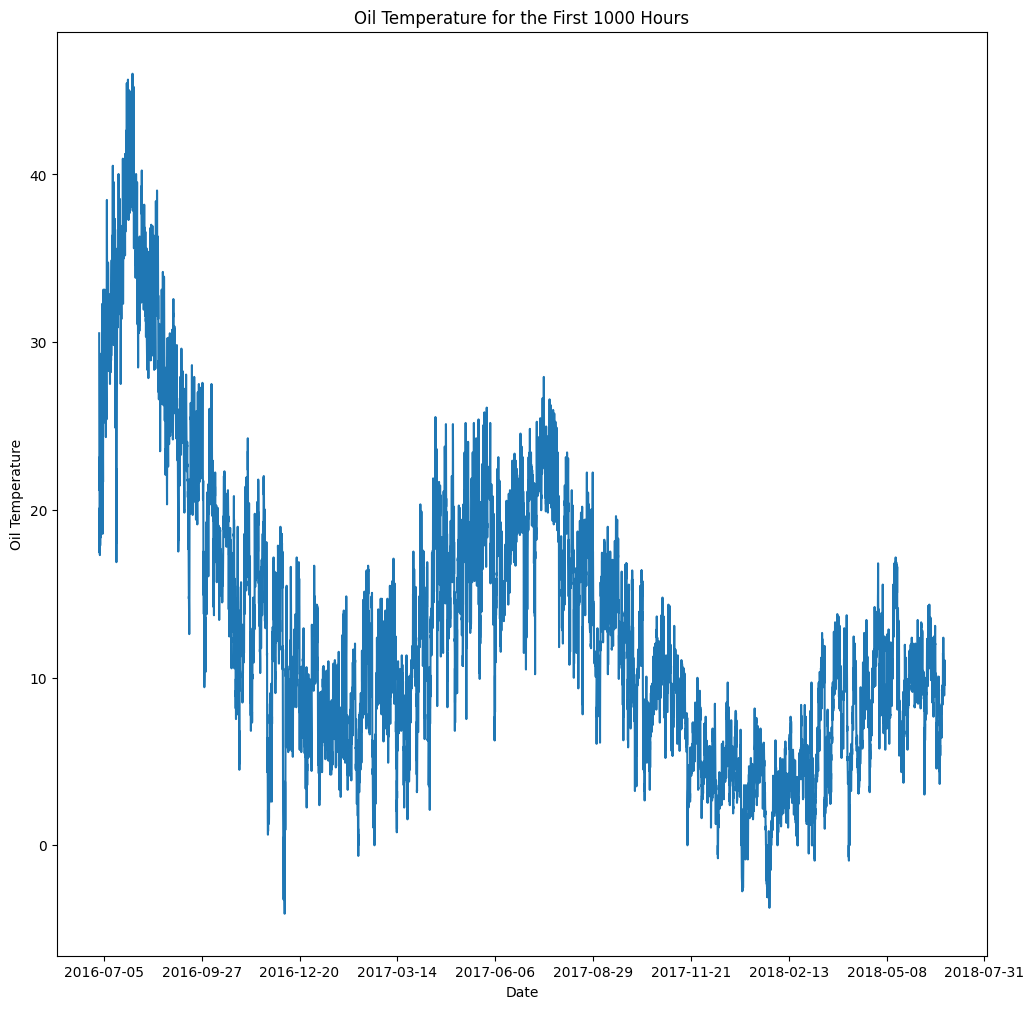

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
sns.lineplot(df1, legend=None)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Oil Temperature",
       title="Oil Temperature for the First 1000 Hours")

# Define the date format
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=12))
plt.show()

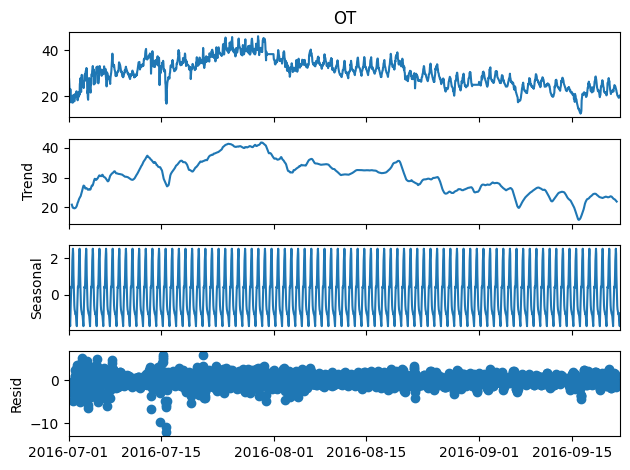

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Next, let’s pass our data frame into the seasonal_decompose method and plot the result:

decompose = seasonal_decompose(df1['OT'][:2000],model='additive', period=24)
decompose.plot()
plt.show()

In [ ]:
_cutoff = int(len(df1)*0.1)
_cutoff2 = int(len(df1)*0.1005)
train, test = df1[:_cutoff], df1[_cutoff:_cutoff2]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


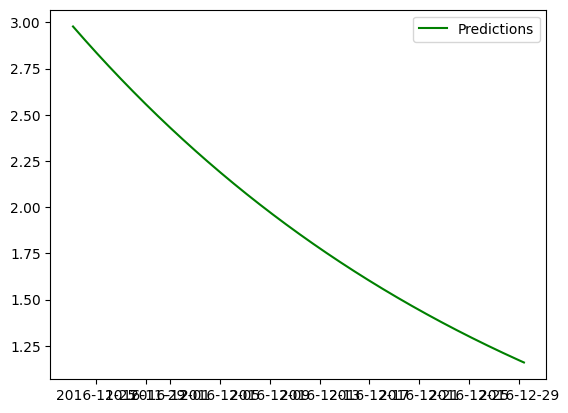

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

ARMAmodel = SARIMAX(train, order = (1, 0, 1))

ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
! pip install pmdarima


In [ ]:

from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
# forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5663.943, Time=3.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5755.987, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5757.971, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5757.971, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5753.997, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5704.166, Time=3.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5761.829, Time=1.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5696.048, Time=3.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5676.403, Time=4.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5759.971, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5698.274, Time=3.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5696.780, Time=3.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5695.577, Time=4.27 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5661.156, Time=1.18 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
test.fillna(0, inplace=True)
forecast.fillna(0, inplace=True)
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  3.8184048183867825


In [ ]:
pred = np.load("/content/results/long_term_forecast_ETTh1_96_96_TimesNet_ETTh1_ftM_sl96_ll48_pl96_dm16_nh8_el2_dl1_df32_fc3_ebtimeF_dtTrue_Exp_0/pred.npy")

In [ ]:
true_pred = np.load("/content/results/long_term_forecast_ETTh1_96_96_TimesNet_ETTh1_ftM_sl96_ll48_pl96_dm16_nh8_el2_dl1_df32_fc3_ebtimeF_dtTrue_Exp_0/true.npy")

In [ ]:
pred[:2,:2,:7]

# Model Comparison

In [ ]:
np.load("/content/results/long_term_forecast_ETTh1_96_96_TimesNet_ETTh1_ftM_sl96_ll48_pl96_dm16_nh8_el2_dl1_df32_fc3_ebtimeF_dtTrue_Exp_0/metrics.npy")

array([4.1202554e-01, 3.8902837e-01, 6.2372136e-01, 1.0719978e+01,
       4.3600266e+04], dtype=float32)

In [ ]:
import numpy as np
from numpy import inf

def RSE(pred, true):
    return np.sqrt(np.sum((true - pred) ** 2)) / np.sqrt(np.sum((true - true.mean()) ** 2))


def CORR(pred, true):
    u = ((true - true.mean(0)) * (pred - pred.mean(0))).sum(0)
    d = np.sqrt(((true - true.mean(0)) ** 2 * (pred - pred.mean(0)) ** 2).sum(0))
    return (u / d).mean(-1)


def MAE(pred, true):
    return np.mean(np.abs(pred - true))


def MSE(pred, true):
    return np.mean((pred - true) ** 2)


def RMSE(pred, true):
    return np.sqrt(MSE(pred, true))


def MAPE(pred, true):
    return np.mean(np.abs((pred - true) / true))


def MSPE(pred, true):
    return np.mean(np.square((pred - true) / true))


def metric(pred, true):
    mae = MAE(pred, true)
    mse = MSE(pred, true)
    rmse = RMSE(pred, true)
    mape = MAPE(pred, true)
    mspe = MSPE(pred, true)

    return mae, mse, rmse, mape, mspe

In [ ]:
arima_metric = metric(forecast, test.OT)
arima_metric

(3.0552659341101256, 14.580215357079396, 3.8184048183867825, inf, inf)

In [ ]:
np.save('arima.npy', arima_metric)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis

# # Define the date format
# date_form = DateFormatter("%Y-%m-%d")
# ax.xaxis.set_major_formatter(date_form)
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=12))
# plt.show()

plt.plot(forecast)
plt.plot(test)
plt.show()

In [ ]:
len(test)

5226